In [7]:
import numpy as np
import matplotlib.pyplot as plt

import time

In [8]:

# define a generator function for the polynomial
def generator_function(x,*par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

# Set the x limits, and the number of points, and calculate the interval
xl = -4.0
xh = 4.0
npoints = 10000

dx = (xh-xl)/npoints

xroots = []
yroots = []

par = np.array([1.80,-4.05,0.4,1.0])

In [9]:
# Define the data arrays (x and y)
#
# Note:  we are "digitizing" this function, based on npoints defined in the cell above!!!!!

xval = np.arange(xl,xh,dx)
yval = generator_function(xval,*par)

In [19]:
start = time.time()

# Define the number of data points in each of the "slices" in x in which we will look for roots.
nsearch = 100

# calculate the number of slices
niter = (int)(npoints/nsearch)

# use the left most data point in the first slice as the comparison point, and keep track of the number of roots found
ycomp = yval[0]
nroots_found = 0

# loop over the slices
for i in range(1,int(niter)+1):
    # Begin at the right most data point in the slice
    #print(i)
    #print(nsearch*(i-1),nsearch*i-1)
    
    y = yval[nsearch*i-1]
    
    # Check to see if we got lucky and landed on an exact zero of the function
    if (y==0):
        print ("Found exact root at x = %f\n" % xval[nsearch*i-1])
        xroots.append(xval[nsearch*i-1])
        yroots.append(0.0)
        nroots_found = nroots_found + 1
    # Otherwise, check to see if there is a root in between the left and right comparison points
    if (y*ycomp<0.0):
        # There is a root in the interval, so apply bisection method
        #
        # First, get the x-values of the left and right ends of the slice
        
        xlow = xval[nsearch*(i-1)]
        xhigh = xval[nsearch*i-1]
        # define a "tolerance" at which point we will say we have found a zero
        epsilon = 1.48E-8
        
        diff = 1.0E12
        while (diff>epsilon):
            # Calculate the function values at the left, right, and midpoints of the slice
            fa = generator_function(xlow,*par)
            fb = generator_function(xhigh,*par)
            xmid = (xhigh+xlow)/2.0
            fc = generator_function(xmid,*par)
            
            # Decide if the root is in the left half or right half of the interval, and redefine
            # the x interval accordingly
            product = fa*fc
            if (product < 0):
                xhigh = xmid
            else:
                xlow = xmid

            # update the difference value
            diff = np.abs(fc)

        print ("Found root at x = %f\n" % xmid)
        xroots.append(xmid)
        yroots.append(0.0)
        nroots_found = nroots_found + 1
        
        # move to the next slice
        ycomp = y
    else:
        # move to the next slice
        ycomp = y

print ("Total number of roots found = %d\n" % nroots_found)

end = time.time()
print("Total time = ",(end - start))
time_ejb = (end-start)

Found root at x = -2.400000

Found root at x = 0.500000

Found root at x = 1.500000

Total number of roots found = 3

Total time =  0.0020449161529541016


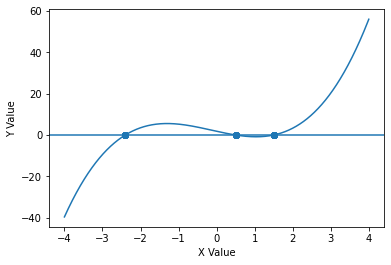

In [18]:
# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1) 

# On the first axis, plot the sine and label the ordinate 
axs.plot(xval,yval)
axs.scatter(xroots,yroots)
axs.set_ylabel('Y Value')
axs.set_xlabel('X Value')
axs.axhline()
plt.show()